# Programming Practice I
## 1 Overview
In this practice, you can learn the basic knowledge of Python. In particular, by doing this practice, it is expected that you can:
* get familiar with the basic syntax of Python;
* get the basic idea of NumPy;
* get the basic idea of Matplotlib for visualization.

## 2 Tasks
In this section, you can start the programming practice task by task. Please pay attention to the hints as well as the API documents online.

### 2.1 Import Packages

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

### 2.2 1D Dataset

In [ ]:
X = []
Y = []

def create_toy_dataset(n_samples=100):
  X = np.linspace(-1,1,num=n_samples)
  Y = 0.1*X + X**2 + X**3
  return X, Y

class dataset():
  def __init__(self, n):
    self.n_samples = n
    self.X = []
    self.Y = []
  def load_data(self):
    self.X, self.Y = create_toy_dataset(self.n_samples)
    return self.X, self.Y

### 2.3 Plot the 1D Dataset

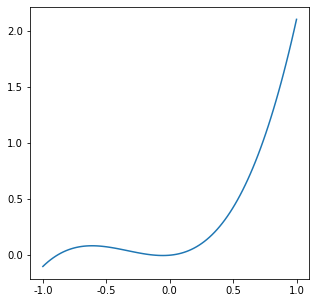

In [ ]:
# TODO: plotting
plt.figure(figsize=(5,5))
my_dataset = dataset(100)
my_dataset.load_data()
plt.plot(my_dataset.X,my_dataset.Y)
plt.xticks(ticks=np.linspace(-1,1,5), labels=np.linspace(-1,1,5))
plt.show()

### 2.4 2D Dataset

In [ ]:
class dataset2D():
  def __init__(self, n):
    self.n_samples = n
  def load_dataset(self):
    X = np.random.normal(0,1,size=(self.n_samples,2))
    Y = np.array([not (np.linalg.norm(i,2) < 1 ) for i in X])
    return X,Y
my_dataset2D = dataset2D(100)
X,Y = my_dataset2D.load_dataset()


### 2.5 Plot the 2D Dataset

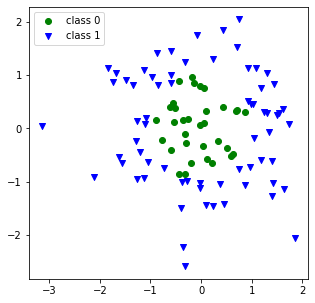

(100,)

In [ ]:
# TODO: plotting
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], marker='o',c='g', label='class 0')
plt.scatter(X[Y==1,0],X[Y==1,1],marker='v',c='b',label='class 1')
plt.legend()
plt.show()
Y.shape

### 2.6 A Simple Convolution

In [ ]:
# TODO: simple convolution
X = np.linspace(0,15, num = 16).reshape(4,-1)
W = np.ones((2,2))
X_conv = np.zeros((3,3)) #this is the output of the convolution 
print(X)

# W single kernel, p = 0, s = 1, d = 1.
def convolve(X, W, p = 0, s = 1, dilation = 1):
  X_height,X_width = X.shape
  k_height,k_width = W.shape
  X_conv_height = np.floor(X_height + 2*p - (k_height - 1) * dilation - 1) + 1
  X_conv_width  = np.floor(X_width + 2*p - (k_width - 1) * dilation - 1) + 1
  X_conv = np.zeros((int(X_conv_height), int(X_conv_width)))
  for i in range(X_conv.shape[0]):
     for j in range(X_conv.shape[1]):
      X_conv[i,j] = np.sum(X[i:i+W.shape[0], j:j+W.shape[1]] * W)
  return X_conv

print(convolve(X,W))

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
[[10. 14. 18.]
 [26. 30. 34.]
 [42. 46. 50.]]


In [ ]:
def prepare_W(W_conv,k_height, k_width):
  for row in range(W_conv.shape[0]):
    for W_row in range(k_height):
      col = int(W_row*2*k_width+row)
      offset = (row+1)//4
      col += offset
      W_conv[row][col : col+k_width]= W[W_row,:]
  return W_conv

W_conv = np.zeros((9,16))
prepare_W(W_conv,2,2)

array([[1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.]])

In [ ]:
# X_conv = W_conv @ X_
def faster_convolve(X, W, p = 0, s = 1):
  dilation = 1
  X_height,X_width = X.shape
  k_height,k_width = W.shape
  X_conv_height = np.floor(X_height + 2*p - (k_height - 1) * dilation - 1) + 1
  X_conv_width  = np.floor(X_width + 2*p - (k_width - 1) * dilation - 1) + 1
  X_conv = np.zeros((int(X_conv_height * X_conv_width), 1))
  X_flatten = X.flatten(order='C')
  
  W_conv = np.zeros((X_conv.shape[0], X_flatten.shape[0]))
  W_conv = prepare_W(W_conv,k_height, k_width)
  X_conv = W_conv @ X_flatten
  X_conv = X_conv.reshape(3,3)
  return X_conv

faster_convolve(X,W)

array([[10., 14., 18.],
       [26., 30., 34.],
       [38., 46., 50.]])

In [ ]:
import time

start = time.time()
for i in range(int(1e6)):
  convolve(X,W)
end = time.time()
print(f'range based convolution cost {end - start}') # with TPU 82s, CPU 78s
print(convolve(X,W))

start = time.time()
for i in range(int(1e6)):
  faster_convolve(X,W)
end = time.time()
print(f'matrix based convolution cost {end-start}') # with TPU 38s, CPU 42s
print(faster_convolve(X,W))

range based convolution cost 79.00616025924683
[[10. 14. 18.]
 [26. 30. 34.]
 [42. 46. 50.]]
matrix based convolution cost 42.152852058410645
[[10. 14. 18.]
 [26. 30. 34.]
 [38. 46. 50.]]


### KL divergence of Gaussian and Laplace


In [ ]:
from tensorflow import keras as k
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
x = np.linspace(-1e2,1e2,int(1e7))

In [ ]:
b = np.sqrt(2/np.pi)
# x = np.array([1,2,3])

In [ ]:
y_gauss = 1/(np.sqrt(2*np.pi)) * np.exp(-x**2/2)
y_laplace = 1/(2*b) * np.exp(-np.abs(x)/ b)

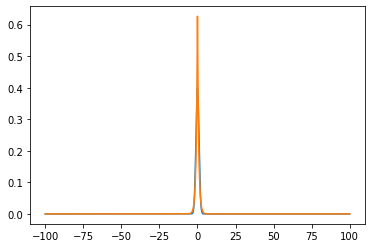

In [ ]:
plt.plot(x,y_gauss)
plt.plot(x,y_laplace)

In [ ]:
KLD = k.losses.kl_divergence(y_gauss, y_laplace)
print(KLD)

tf.Tensor(2420.576415831516, shape=(), dtype=float64)


In [ ]:
import tensorflow_probability as tfp

In [ ]:
dist_a = tfp.distributions.laplace.Laplace(0,np.sqrt(2/np.pi))
dist_b = tfp.distributions.normal.Normal(0,1)
dist_a = tfp.distributions.normal.Normal(0,2)
print(tfp.distributions.kl_divergence(distribution_a=dist_a, distribution_b=dist_b))

tf.Tensor(0.8068528, shape=(), dtype=float32)
